# Assignment Week 5 

## Building and Training the Model

This code snippet builds a binary classification model for the IMDB dataset. It includes an attention layer wrapped with a residual connection and layer normalization. Key components of the model are:

Embedding Layer: Converts words into dense vectors.

LSTM Layer: Captures sequential patterns in text.

Attention Layer: Focuses on relevant parts of the input.

Residual Connection: Adds the input back to the output of the attention layer.

Layer Normalization: Stabilizes learning by normalizing outputs.

Global Average Pooling: Reduces dimensions before classification.

Output Layer: Binary classification with a sigmoid activation.

The model is compiled using the Adam optimizer and trained on the IMDB dataset. It is then evaluated on a test set to assess performance.


In [1]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Dense, Attention, LayerNormalization, Add, GlobalAveragePooling1D
)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

# Parameters
max_features = 20000  # Vocabulary size
maxlen = 200  # Maximum length of sequences
embedding_dim = 128  # Dimension of embeddings

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Model definition
input_layer = Input(shape=(maxlen,), dtype="int32")

# Embedding layer
embedding_layer = Embedding(max_features, embedding_dim)(input_layer)

# LSTM layer
lstm_output = LSTM(128, return_sequences=True)(embedding_layer)

# Attention layer
attention_layer = Attention()([lstm_output, lstm_output])

# Residual connection
residual_connection = Add()([lstm_output, attention_layer])

# Layer normalization
normalized_output = LayerNormalization()(residual_connection)

# Global average pooling
pooled_output = GlobalAveragePooling1D()(normalized_output)

# Output layer
output_layer = Dense(1, activation="sigmoid")(pooled_output)

# Define and compile model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

# Train model
model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 128)  │  2,560,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 200, 128)  │    131,584 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 200, 128)  │          0 │ lstm[0][0],       │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 200, 128)  │          0 │ lstm[0][0],       │
│                     │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 200, 128)  │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,691,969 (10.27 MB)

 Trainable params: 2,691,969 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.7521 - loss: 0.4842 - val_accuracy: 0.8786 - val_loss: 0.2961
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9350 - loss: 0.1714 - val_accuracy: 0.8854 - val_loss: 0.3156
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9741 - loss: 0.0761 - val_accuracy: 0.8864 - val_loss: 0.3499
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8640 - loss: 0.4106
Test Loss: 0.41017672419548035, Test Accuracy: 0.864080011844635


### Visualizing Attention Weights
This snippet visualizes the attention weights of the trained model. Steps include:

Extract a Random Test Sample: A single input sequence from the test data.

Build a Temporary Model: Extracts the output of the attention layer (Attention).

Process Attention Scores: Focus on a subsection of the sequence for clarity.

Map Indices to Words: Use the IMDB dataset’s word index to convert input tokens back to human-readable words.

Plot Attention Heatmap: A heatmap is generated using seaborn to visualize how much attention the model assigns to each word in the subsection.


The heatmap uses the viridis color map and labels each axis with corresponding words from the input sequence. The visualization provides insight into which parts of the input influenced the model’s predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


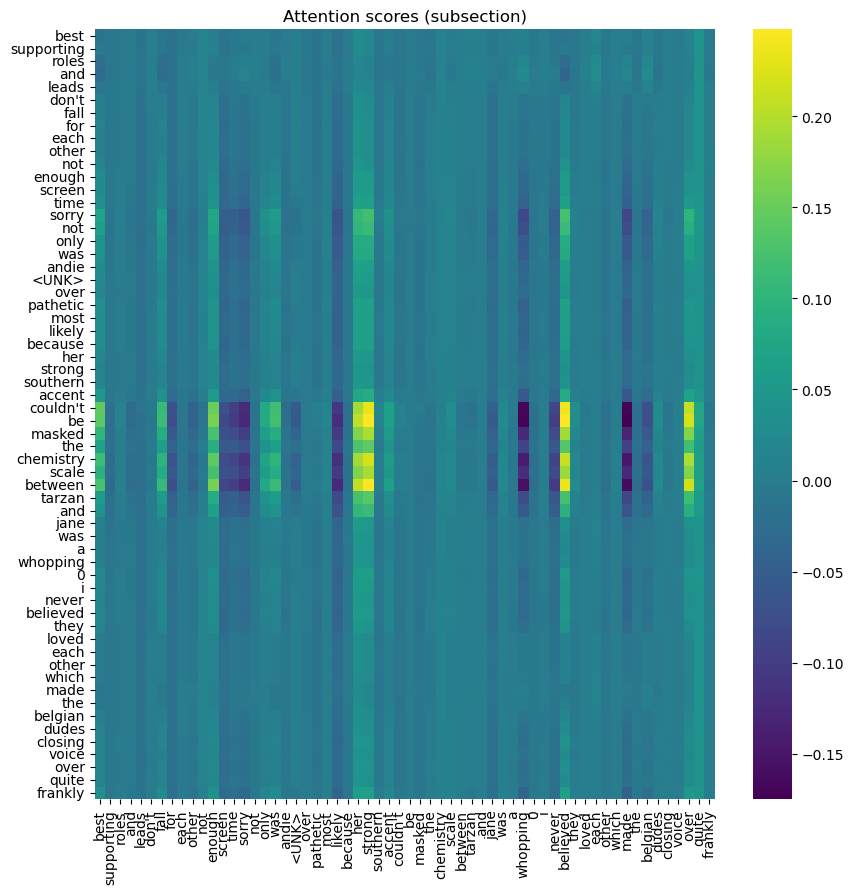

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sample_index = np.random.randint(0, len(x_test))
sample_input = x_test[sample_index:sample_index + 1]


attention_model = Model(inputs=model.input, outputs=model.layers[3].output)  # layer[3] = Attention layer
attention_scores = attention_model.predict(sample_input)[0]


sub_length = 60  
sub_scores = attention_scores[:sub_length, :sub_length]


word_index = imdb.get_word_index()
index_to_word = {v + 3: k for k, v in word_index.items()}  
index_to_word[0], index_to_word[1], index_to_word[2] = "<PAD>", "<START>", "<UNK>"

plt.figure(figsize=(10, 10))
sns.heatmap(
    sub_scores,
    cmap='viridis',
    xticklabels=[index_to_word.get(i, '?') for i in sample_input[0][:sub_length]],
    yticklabels=[index_to_word.get(i, '?') for i in sample_input[0][:sub_length]]
)
plt.title('Attention scores (subsection)')
plt.show()



### Summary
These snippets demonstrate building a neural network with attention mechanisms and visualizing its internal workings. The first snippet focuses on architecture and training, while the second enables interpretability by plotting attention scores. This combination ensures a well-performing model and a deeper understanding of its behavior.